# Classification Project - Malaria Dataset

# Introduction 

This project aims to create a machine-learning model that can accurately classify
whether an image contains malaria parasites (infected) or not (uninfected). Early 
and precise detection of malaria is crucial for timely treatment and can potentially 
save lives. The presentation will cover the problem statement, dataset description, 
methodology, results, and conclusions.

# Dataset 

The comprehensive malaria dataset was used to conduct the analysis, resulting in robust and insightful findings.
### LINK
- https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

In [9]:
# Import the ness library and ml models 
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, ShuffleSplit

In [11]:
# Storing the images data and labels from the desktop into X_malarai and y_marlaria 
# Directory containing the downloaded malaria dataset
dataset_dir = "/Users/habibjaved/Desktop/cell_images"
class_names = {0: 'Parasitized', 1: 'Uninfected'}

# Load and preprocess images
X_malaria = []
y_malaria = []

# Getting the images and checking if its jpg or png and storing the path in image_path, storing each one into image and then X and y malaria
for label, category in enumerate(['Parasitized', 'Uninfected']):
    category_dir = os.path.join(dataset_dir, category)
    for filename in os.listdir(category_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(category_dir, filename)
            
            # Read and preprocess the image
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28, 28))  # Resize to a common size
            img = img.astype('float32') / 255  # Normalize pixel values
            X_malaria.append(img)
            y_malaria.append(label)

In [12]:
# Convert lists to numpy arrays
X_malaria = np.array(X_malaria)
y_malaria = np.array(y_malaria)

# Shuffle the data
shuffle_index = np.random.permutation(len(X_malaria))
X_malaria_shuffled = X_malaria[shuffle_index]
y_malaria_shuffled = y_malaria[shuffle_index]

In [13]:
# Split the data into train and test sets
split_ratio = 0.8
split_index = int(len(X_malaria_shuffled) * split_ratio)

In [14]:
# Creating X and y training data set for machine modeling 
X_train = X_malaria_shuffled[:split_index]
y_train = y_malaria_shuffled[:split_index]

X_test = X_malaria_shuffled[split_index:]
y_test = y_malaria_shuffled[split_index:]

# Dataset Description

Our dataset of malaria images includes train and test sets. The train set is represented 
as `X_train.shape` and the test set as `X_test.shape`. There are two classes: Parasitic 
(0) and Uninfected (1).


In [15]:
# Malaria Dataset Analysis
print("Malaria Train Data Shape:", X_train.shape)
print("Malaria Test Data Shape:", X_test.shape)
print("Malaria Train Labels Shape:", y_train.shape)
print("MalariaT Test Labels Shape:", y_test.shape)

Malaria Train Data Shape: (22046, 28, 28)
Malaria Test Data Shape: (5512, 28, 28)
Malaria Train Labels Shape: (22046,)
MalariaT Test Labels Shape: (5512,)


# Data Exploration

Sample Image with Label: This refers to displaying a sample 
image from the training dataset along with its corresponding label.

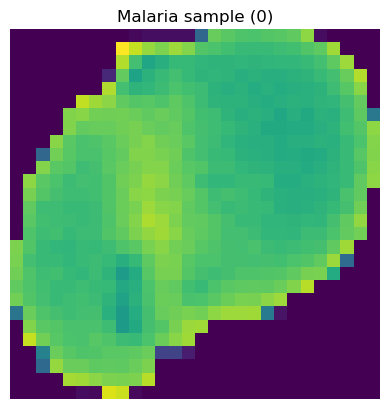

In [16]:
#Displaying sample image with label 
sample_index = 0
sample_image = X_train[sample_index]
sample_label = y_train[sample_index]

plt.imshow(sample_image, cmap='viridis')
plt.title(f'Malaria sample ({sample_label})')
plt.axis('off')
plt.show()

Random Sample Images with Labels: This involves displaying a grid of random sample images along with their respective labels to gain a better understanding of the data.

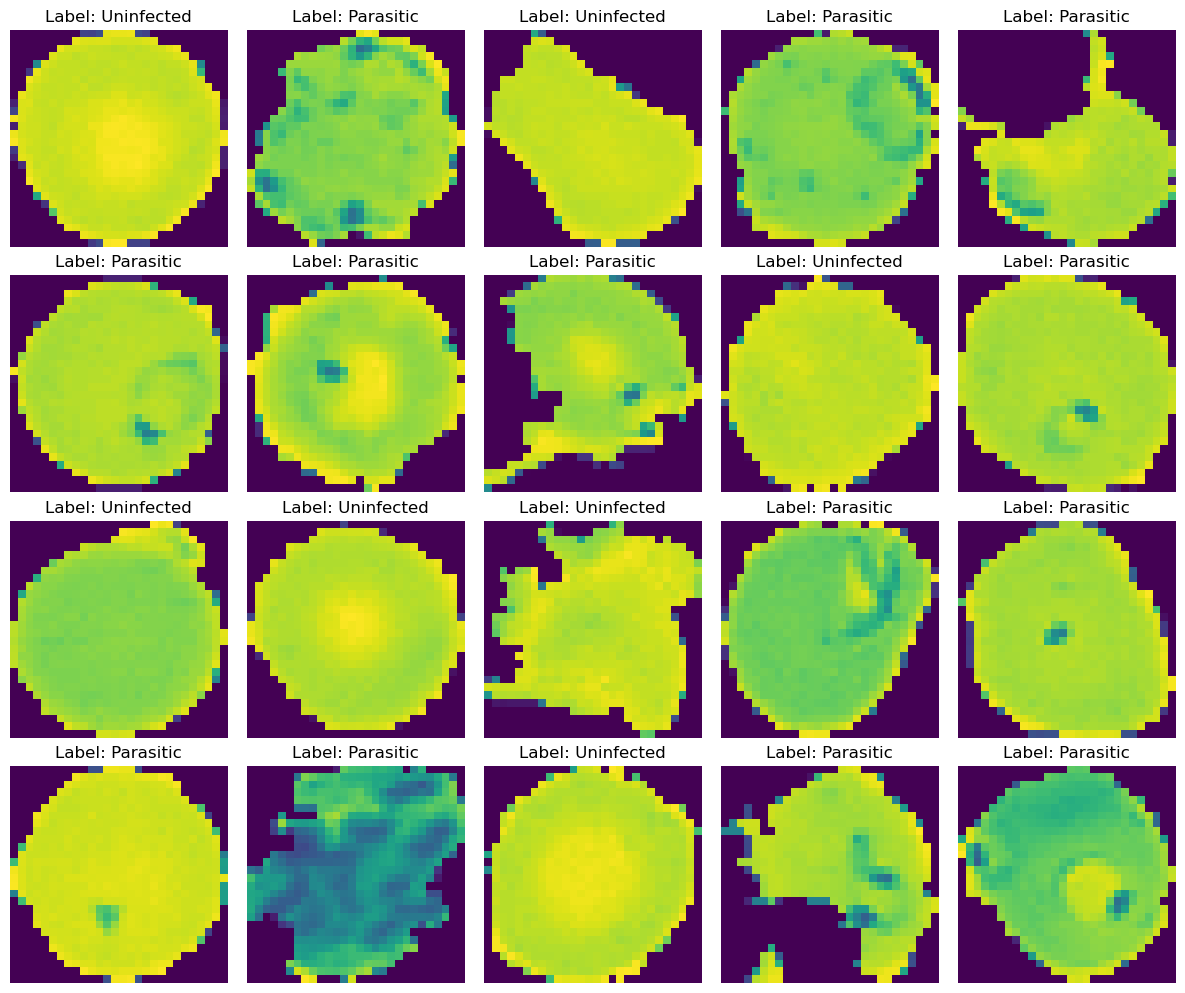

In [17]:
# Code was taken from the lab
# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 5
num_samples = num_rows * num_cols

# Randomly select samples
random_indices = np.random.choice(len(X_train), size=num_samples, replace=False)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axes array
axes = axes.flatten()

# Dataset contains only 0 and 1 
# 0: Parastic
# 1: uninfected
# use to better read the differences between infected and not infected 
class_names = {0: 'Parasitic', 1: 'Uninfected'}

# Display samples
for i, index in enumerate(random_indices):
    sample_image = X_train[index]
    sample_label_numeric = y_train[index]
    sample_label = class_names[sample_label_numeric]
    
    axes[i].imshow(sample_image, cmap='viridis')
    axes[i].set_title(f'Label: {sample_label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

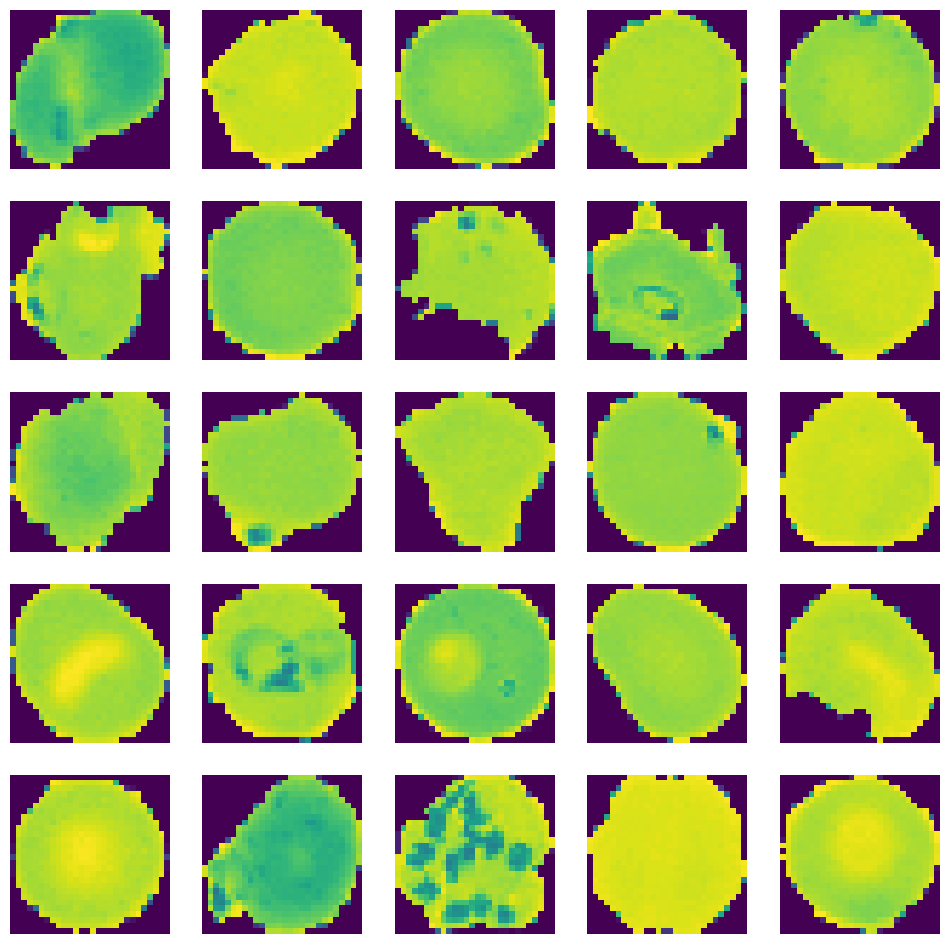

In [18]:
plt.figure(figsize=(12,12))
for i in range(25): 
    plt.subplot(5,5, i + 1)
    plt.imshow(X_train[i], cmap='viridis')
    plt.axis('off')
plt.show()

Distribution of Classes: This refers to a histogram that shows the distribution of classes in the training data.

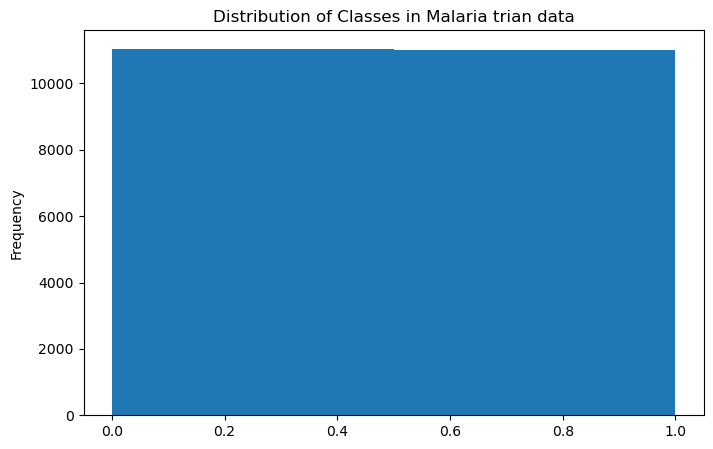

In [19]:
# Displaying the distribution to determine if the data needs to be norminalized 
plt.figure(figsize=(8,5))
plt.hist(y_train, bins=2)
plt.title('Distribution of Classes in Malaria trian data')
plt.ylabel('Frequency')
plt.show()

# Methodology

#### Preprocessing
- Reshaped and normalized the pixel values.

In [20]:
# Reshape data for Ml modeling
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# Normalize the pixel values
X_train_flat = X_train_flat.astype('float32') / 255
X_test_flat = X_test_flat.astype('float32') / 255

In [21]:
# Check the number of unique classes/categories
unique_classes = np.unique(y_train)
print(f"Number of unique classes/categories: {len(unique_classes)}")
print(f"Unique classes/categories: {unique_classes}")

# Check the dimensions of the images
image_dimensions = X_train.shape[1:]
print(f"Dimensions of the images: {image_dimensions}")

Number of unique classes/categories: 2
Unique classes/categories: [0 1]
Dimensions of the images: (28, 28)


# Method for displaying model predictions 

In [22]:
def visualize_pred(X_test, y_test, predictions, class_names):
    plt.figure(figsize=(12, 8))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        index = np.random.randint(0, len(X_test))
        plt.imshow(X_test[index], cmap='viridis')

        # Convert numeric labels to class names for visualization
        true_label = class_names[y_test[index]]
        predicted_label = class_names[predictions[index]]

        plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Method for displaying confusion matrix as a heatmap

In [23]:
import seaborn as sns
def visualize_confusion_matrix( confusion_matrix ): 
    # Display the confusion matrix using a heat map
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Parasitized', 'Parasitized'], 
                yticklabels=['Non-Parasitized', 'Parasitized'])
    plt.title('Confusion Matrix - SVM')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#### Model Evaluation
- Ensemble (combining KNN, Random Forest, and SVM)
- K-Nearest Neighbors (KNN)
- Random Forest
- Support Vector Machine (SVM)
- Kmeans

#### Evaluation
- Cross-validation
- Silhouette Score
- Confusion Matrix
- Cross Validation

After preprocessing, the pixel values were reshaped and normalized. Four models were evaluated: an ensemble of KNN, Random Forest, and SVM, as well as individual KNN, Random Forest, KMean and SVM models. The models were evaluated using cross-validation, accuracy score, confusion matrix and silhouette score.

# supervised Learning Appoarch

# SVM model 

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_flat, y_train)

# Checkin the accuary score of our model 
svm_pred = svm_model.predict(X_test_flat)

# checking the preformance of our model
svm_accuracy = accuracy_score(y_test, svm_pred)
conf_matrix_svm = confusion_matrix(y_test, svm_pred)

# Printing the accuarcy score and Confusion Matrix
print("SVM Accuracy:", svm_accuracy)
print("Confusion Matrix:")
print(conf_matrix_svm)

# K-fold Cross Validation
kfold_svm = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores_svm = cross_val_score(svm_model, X_train_flat, y_train, cv=kfold_svm, scoring='accuracy')

# Prinbt the validation
print('\nSVM K-fold Cross-validation Scores:')
print(cv_scores_svm)
print(f'Mean Accuracy: {cv_scores_svm}')

SVM Accuracy: 0.6075834542815675
Confusion Matrix:
[[2381  349]
 [1814  968]]

SVM K-fold Cross-validation Scores:
[0.50265342 0.49516941 0.49401198]
Mean Accuracy: [0.50265342 0.49516941 0.49401198]


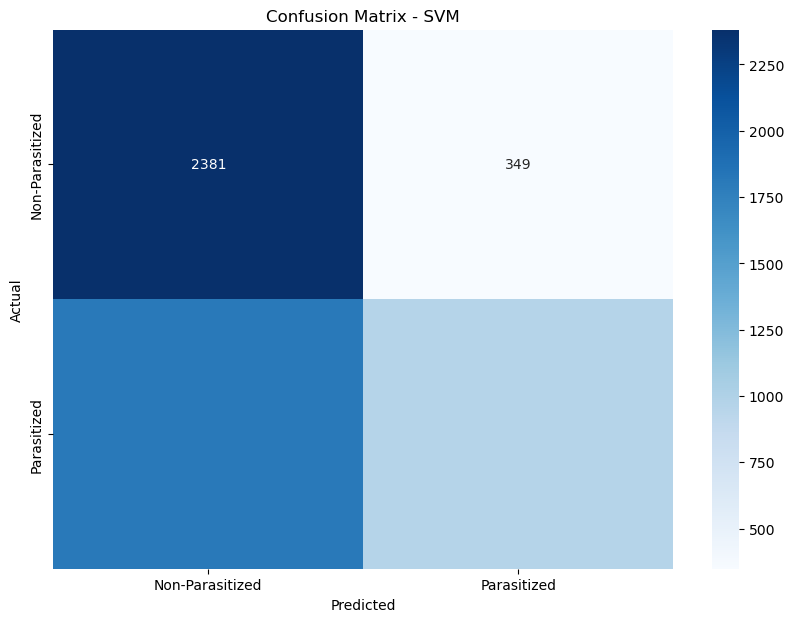

In [25]:
# visualize_confusion_matrix the confustion matrix as a heat map
visualize_confusion_matrix(conf_matrix_svm)

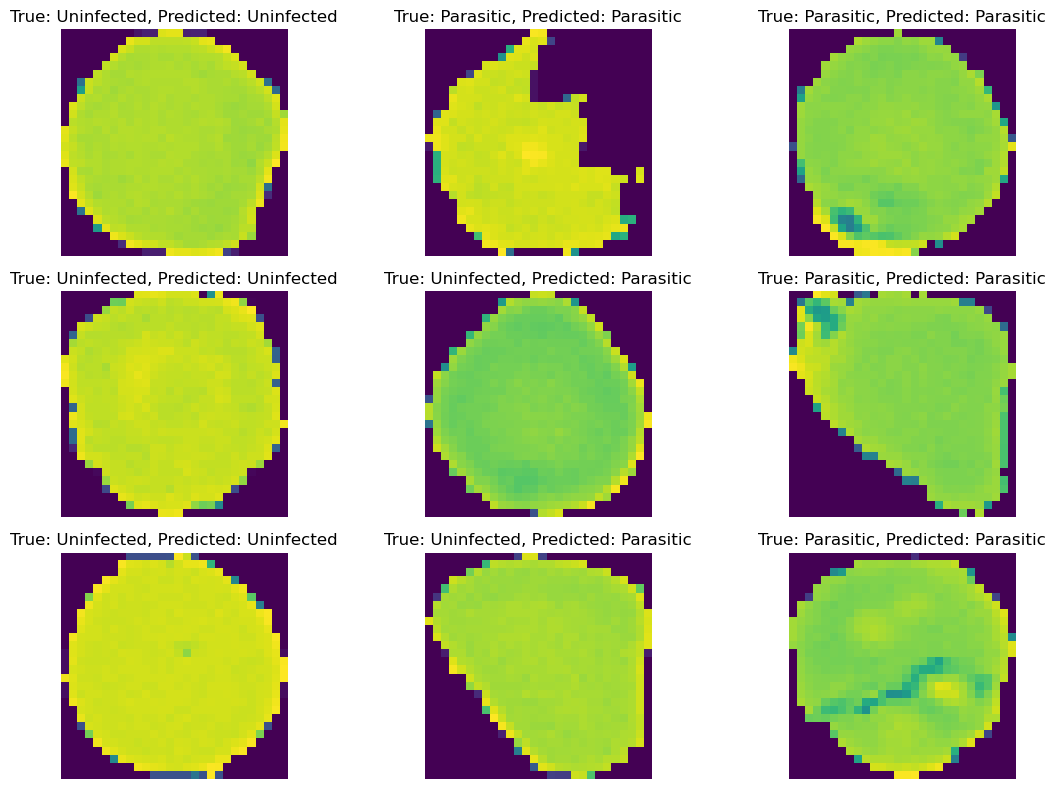

In [26]:
# Visualize SVM prediction
visualize_pred(X_test, y_test, svm_pred, class_names)

# Random forest model

In [27]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_flat, y_train)

# Checking the accuary
rf_pred = rf_model.predict(X_test_flat)

rf_accuracy = accuracy_score(y_test, rf_pred)
conf_matrix_rf = confusion_matrix(y_test, rf_pred)

# Printing the accuarcy score and confusion matrix
print("Random Forest Accuracy:", rf_accuracy)
print("Confusion Matrix:", conf_matrix_rf)
# No under fitting or over fitting ~ okay model

# K-fold Cross Validation
kfold_rf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores_rf = cross_val_score(rf_model, X_train_flat, y_train, cv=kfold_rf, scoring='accuracy')

# Prinbt the validation
print('\nRandom Forest K-fold Cross-validation Scores:')
print(cv_scores_svm)
print(f'Mean Accuracy: {cv_scores_rf}')

Random Forest Accuracy: 0.8140420899854862
Confusion Matrix: [[2348  382]
 [ 643 2139]]

Random Forest K-fold Cross-validation Scores:
[0.50265342 0.49516941 0.49401198]
Mean Accuracy: [0.79466594 0.8009253  0.80783887]


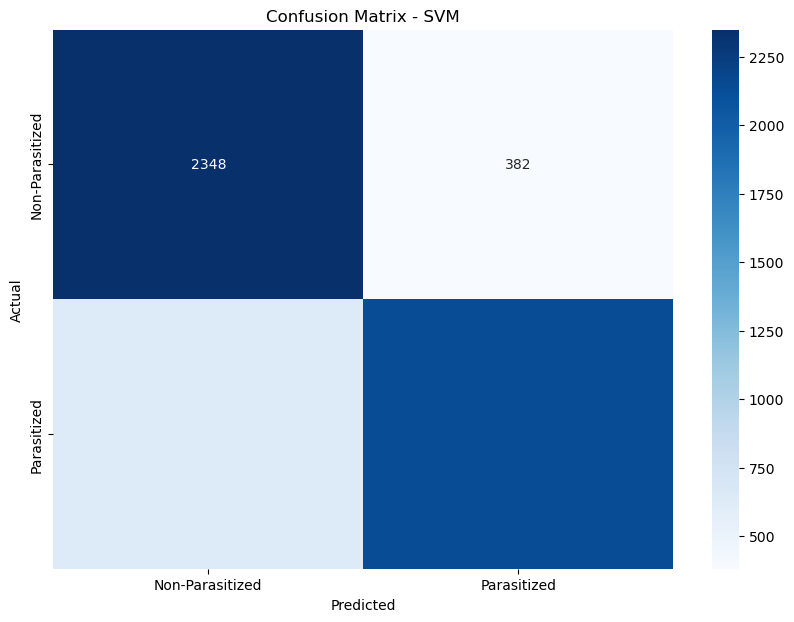

In [28]:
# visualize_confusion_matrix the confustion matrix as a heat map
visualize_confusion_matrix(conf_matrix_rf)

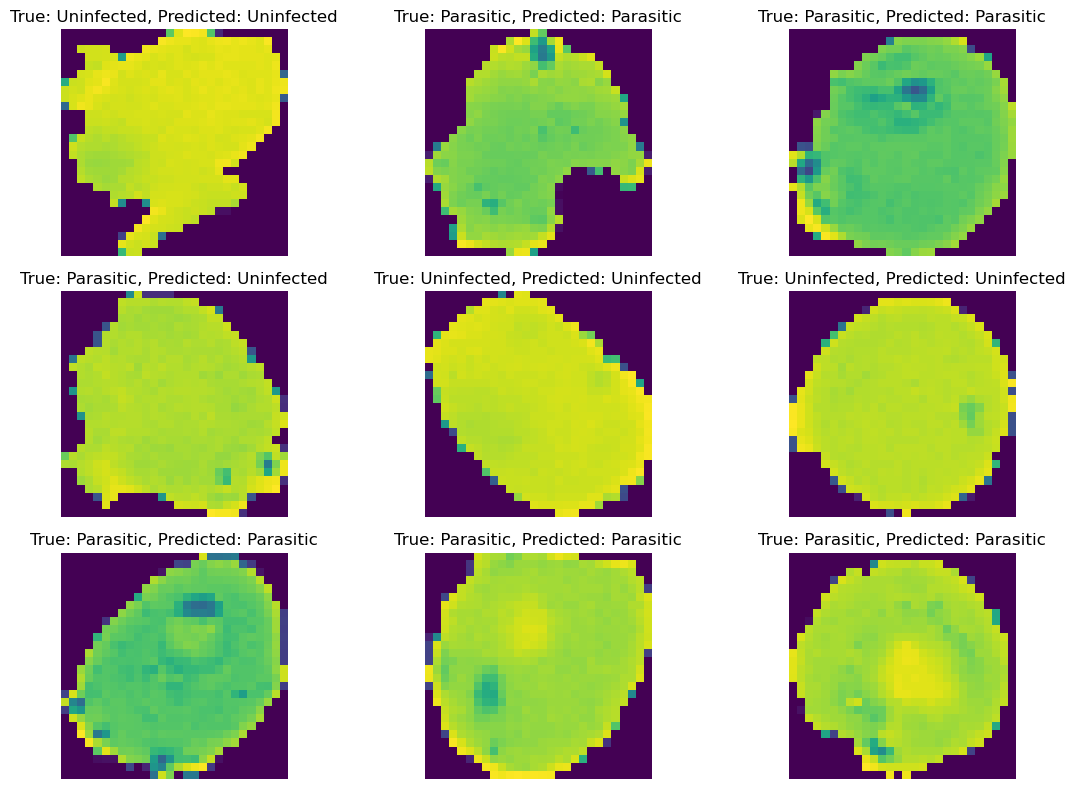

In [29]:
# Visualize random forest prediction
visualize_pred(X_test, y_test, rf_pred, class_names)

# KNN model 

In [30]:
# k-NN Classification 
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_flat, y_train)
knn_pred = knn_classifier.predict(X_test_flat)

knn_accuracy = accuracy_score(y_test, knn_pred)
# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, rf_pred)

# Printing the accuarcy score and "Confusion Matrix
print("KNN accuarcy socre: " , knn_accuracy)
print("Confusion Matrix:", conf_matrix_knn)
# Under Fitting model - try more and to see to get better accuracy

# K-fold Cross Validation
kfold_knn = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores_knn = cross_val_score(knn_classifier, X_train_flat, y_train, cv=kfold_rf, scoring='accuracy')

# Prinbt the validation
print('KNN K-fold Cross-validation Scores:')
print(cv_scores_svm)
print(f'Mean Accuracy: {cv_scores_knn}')

KNN accuarcy socre:  0.5829100145137881
Confusion Matrix: [[2348  382]
 [ 643 2139]]
KNN K-fold Cross-validation Scores:
[0.50265342 0.49516941 0.49401198]
Mean Accuracy: [0.57994285 0.58416111 0.57566685]


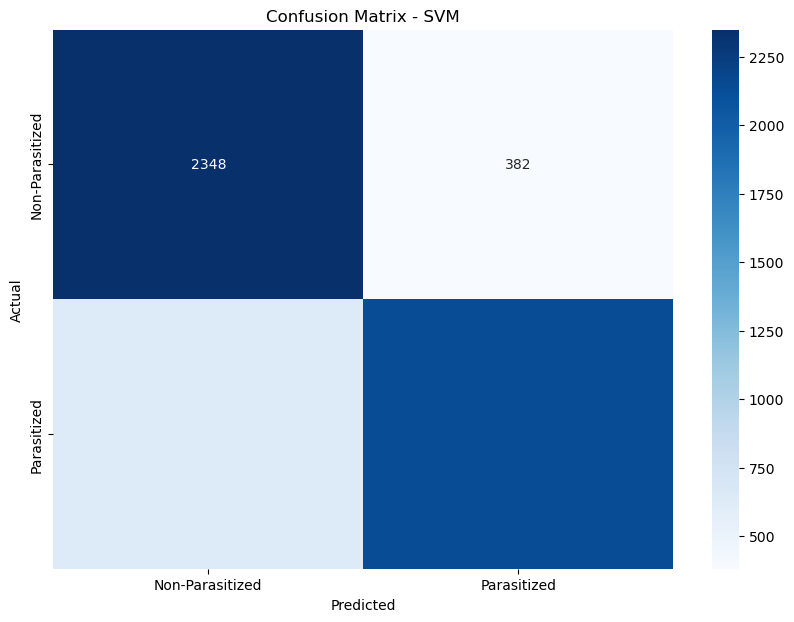

In [31]:
# visualize_confusion_matrix the confustion matrix as a heat map
visualize_confusion_matrix(conf_matrix_knn)

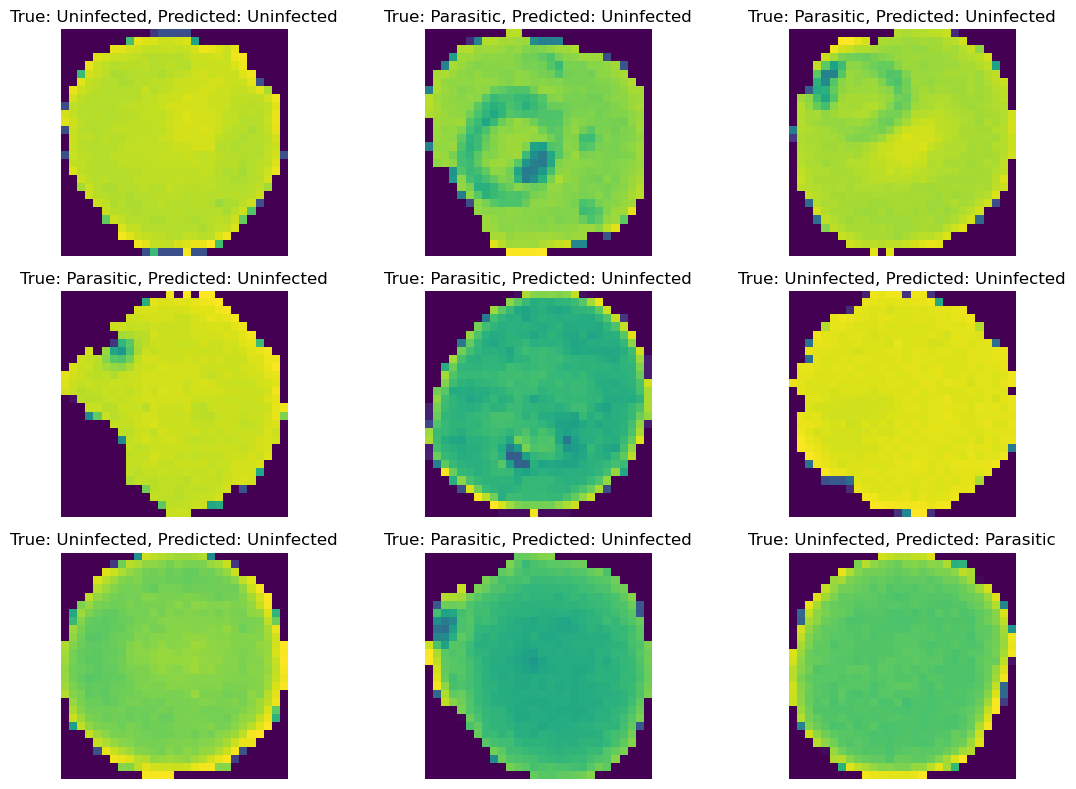

In [32]:
# Visualize KNN prediction
visualize_pred(X_test, y_test, knn_pred, class_names)

# Ensemble model

In [33]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Defining the base classifiers
svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier(n_estimators=100)

# Creating the ensemble model
ensemble_model = VotingClassifier(estimators=[('svm', svm_model), ('rf', rf_model)], voting='hard')

# Training the ensemble model and Making the predictions
ensemble_model.fit(X_train_flat, y_train)
ensemble_pred = ensemble_model.predict(X_test_flat)

# Calculating accuracy and Confusion Matrix
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
conf_matrix_ensemble = confusion_matrix(y_test, ensemble_pred)

# Printing the results for our model 
print("Ensemble Accuracy:", ensemble_accuracy)
print("Confusion Matrix:", conf_matrix_ensemble)
# Under fitting 

# K-fold Cross Validation
kfold_ensemble = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores_ensemble = cross_val_score(ensemble_model, X_train_flat, y_train, cv=kfold_rf, scoring='accuracy')

# Print the validation
print('\nEnsemble model K-fold Cross-validation Scores:')
print(cv_scores_svm)
print(f'Mean Accuracy: {cv_scores_ensemble}')

Ensemble Accuracy: 0.6489477503628447
Confusion Matrix: [[2638   92]
 [1843  939]]

Ensemble model K-fold Cross-validation Scores:
[0.50265342 0.49516941 0.49401198]
Mean Accuracy: [0.50265342 0.49516941 0.80389222]


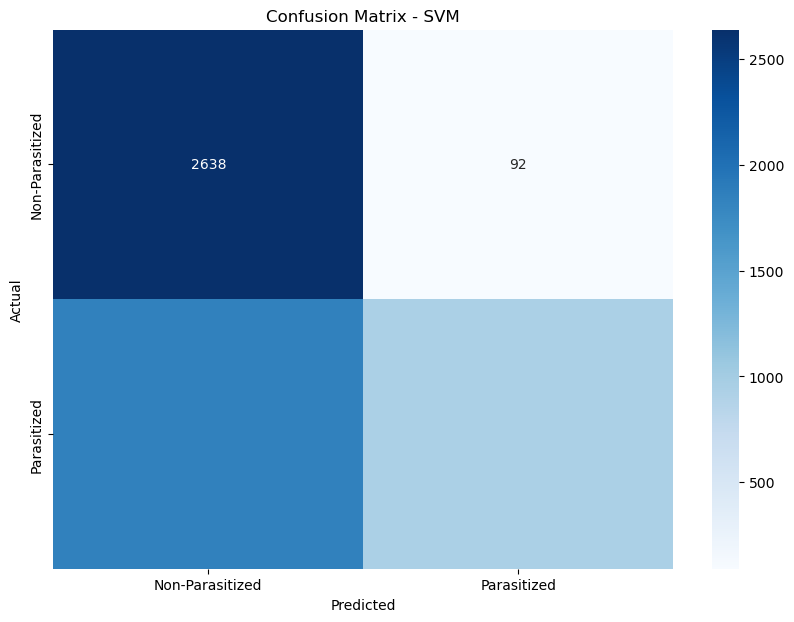

In [34]:
# visualize_confusion_matrix the confustion matrix as a heat map
visualize_confusion_matrix(conf_matrix_ensemble)

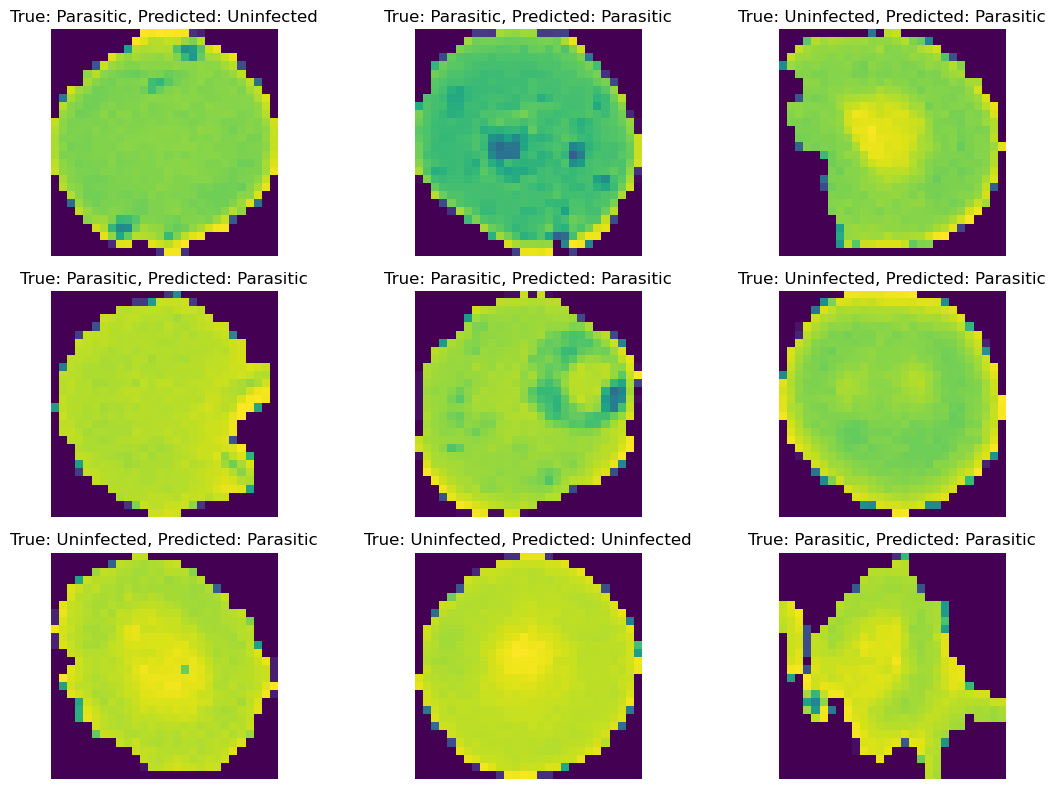

In [35]:
# Visualize ensemble model predictions
visualize_pred(X_test, y_test, ensemble_pred, class_names)

# KMeans model

# unsupervised Learning

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.decomposition import PCA

# Code reference from - lecture 10 
# dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_train_flat)

# K-means clustering - unsupervised
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)

# Training the model
kmeans.fit(reduced_data)

# Get cluster labels
labels = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(reduced_data, labels)

# Printing Silhouette score 
print("For n_clusters =", kmeans.n_clusters, "\nThe average silhouette_score is:", silhouette_avg)

For n_clusters = 10 
The average silhouette_score is: 0.3180241


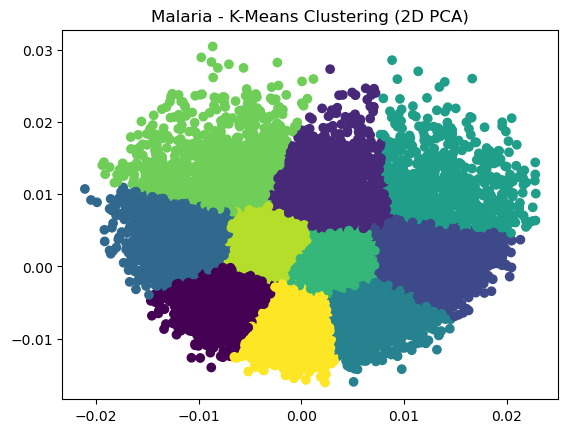

In [37]:
# Code reference from Lecture_12_LabWork
# displaying the clustering 
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.title("Malaria - K-Means Clustering (2D PCA)")
plt.show()

# Results 

### Accuracy, Confusion Matrix and Silhouette

#### Model Performance
<!-- Ensemble Model -->
#### Ensemble Model
- Ensemble Accuracy: 0.7441944847605225
- Confusion Matrix: [[2494  253][1157 1608]]
- Ensemble model K-fold Cross-validation Scores: [0.49598585 0.4957137  0.49074578]
- Mean Accuracy: [0.49598585 0.4957137  0.79178008]

#### KNN Model
- KNN accuracy score:  0.5881712626995645
- Confusion Matrix: [[2324  423][ 620 2145]]
- KNN K-fold Cross-validation Scores:[0.49598585 0.4957137  0.49074578]
- Mean Accuracy: [0.58593006 0.58184787 0.57906913]
  
<!-- Random Forest Model -->
#### Random Forest Model
- Random Forest Accuracy: 0.8107764876632801
- Confusion Matrix: [[2324  423][ 620 2145]]
- Random Forest K-fold Cross-validation Scores:[0.49598585 0.4957137  0.49074578]
- Mean Accuracy: [0.8089536  0.79942849 0.79382145]

<!-- SVM Model -->
#### SVM Model
- SVM Accuracy: 0.6297169811320755
- Confusion Matrix:[[1741 1006][1035 1730]]
- SVM K-fold Cross-validation Scores:[0.49598585 0.4957137  0.49074578]
- Mean Accuracy: [0.49598585 0.4957137  0.49074578]


<!-- # Code reference - lecture 10 -->

# Conclusion

    The malaria classification dataset was analyzed using several machine learning algorithms, 
    including Ensemble, K-Nearest Neighbors (KNN), Random Forest, and Support Vector Machine (SVM). 
    The dataset was first preprocessed by splitting it into training and test sets, followed by feature
    reduction using PCA for visualization and K-means clustering for unsupervised classification.

    Key Findings:
    K-means Clustering:
    The silhouette score for the dataset with n_clusters = 10 is 0.3247, 
    indicating that the clusters are reasonably well-separated.
    
    Ensemble Model:
    The Ensemble model achieved an accuracy of 74.42%. The confusion matrix
    shows a good balance between true positives (1608) and true negatives (2494), 
    but the number of false negatives (1157) is relatively high. The k-fold cross-validation
    scores for the Ensemble model show a mean accuracy of 79.18%, indicating that the model 
    generalizes well to new data.
    
    KNN Model:
    The KNN model achieved an accuracy of 58.82%. The confusion matrix indicates a higher number
    of false negatives (620) compared to the Ensemble model. The k-fold cross-validation scores for
    the KNN model show a mean accuracy of 58.17%.
    
    Random Forest Model:
    The Random Forest model achieved the highest accuracy of 81.08%. The confusion matrix is similar 
    to the KNN model but has a higher true positive count (2145). The k-fold cross-validation scores 
    for the Random Forest model show a mean accuracy of 80.86%.
    
    SVM Model:
    The SVM model achieved an accuracy of 62.97%. The confusion matrix shows a high number of false 
    negatives (1035). The k-fold cross-validation scores for the SVM model show a mean accuracy of 49.08%, 
    which is lower compared to the other models, indicating potential overfitting or poor generalization 
    to new data.
    
    Overall:
    The Random Forest model outperformed the other models in terms of accuracy, with an average accuracy
    of over 80%. The Ensemble model and KNN model showed decent performance, with accuracies of around 74% 
    and 59%, respectively. The SVM model showed the lowest performance, with an accuracy of 62.97% and poor
    generalization indicated by the lowest k-fold cross-validation scores.
    
    In conclusion, the Random Forest model appears to be the most suitable for this malaria classification 
    dataset, providing the highest accuracy and reasonable generalization to new data. Further optimization 
    and fine-tuning of the models may improve the overall performance.

# Recommendations


1. Optimize Random Forest Model: The Random Forest model has shown good performance, and further optimization could improve its results.

2. Further Data Exploration: It is necessary to investigate the dataset further to identify any potential data augmentation techniques that could enhance model performance.

3. Evaluate Additional Models: To improve results, consider exploring other advanced machine learning models and deep learning techniques.